In [1]:
import math
import matplotlib.pyplot as plt
import datetime

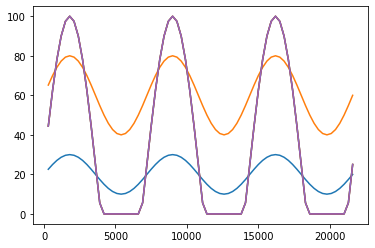

In [46]:

def clamp(n, minimum=0, maximum=100):
    n = max(n,minimum)
    n = min(n, maximum)
    return n
start = datetime.datetime.now()
start = start.replace(microsecond=0, second=0, minute=0, hour=0)
current = datetime.datetime.now()
current = current.replace(microsecond=0, second=0, minute=0, hour=0)
interval = datetime.timedelta(minutes=1)
section_length = datetime.timedelta(hours=6)
# section for sine wave conditions at 10 minutes
interval = datetime.timedelta(minutes=5)
temp_range = (10, 30)
temp_amp = temp_range[1] - temp_range[0]
humidity_range = (40, 80)
humidity_amp = humidity_range[1] - humidity_range[0]
i = 0
t = []
d = []
freq = 3600
channels = [0,0,0]
while current < start + section_length:
    current += interval
    i = (current.timestamp() - start.timestamp()) / freq
    # scaling to get sin between 0 and 1
    sin = math.sin(i * math.pi) / 2 + 0.5
    temp = temp_range[0] + (sin * temp_amp)
    humidity = humidity_range[0] + (sin * humidity_amp)
    channels[0] = clamp(-50 + (sin * 150))
    channels[1] = clamp(-50 + (sin * 150))
    channels[2] = clamp(-50 + (sin * 150))
    
    d.append([temp, humidity] + channels)
    t.append(current.timestamp() - start.timestamp())
plt.plot(t, d)
plt.show()